In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from google.colab import drive

# Parte 1 - Resolvendo um Problema Linearmente Separável

In [ ]:
#carregando arquivo "dataAll.txt" do drive
drive.mount('/content/drive')
dataAll = np.fromfile("/content/drive/My Drive/dataAll.txt")
np.set_printoptions(threshold=sys.maxsize)
len(dataAll)

Mounted at /content/drive


3000

In [ ]:
#separando as entradas com seus respectivos valores de x1, x2 e yd
dataAll_split = np.split(dataAll, 1000)
len(dataAll_split)
print(dataAll_split[0])

[-363.7884  244.1423    0.    ]


In [ ]:
#mostrando as primeiras entradas
j=0
for j in range (5):
    print(dataAll_split[j])

[-363.7884  244.1423    0.    ]
[ 328.7572 -256.7658    1.    ]
[-164.9827  613.2164    0.    ]
[536.5905 764.9575   0.    ]
[314.2297 343.8375   0.    ]


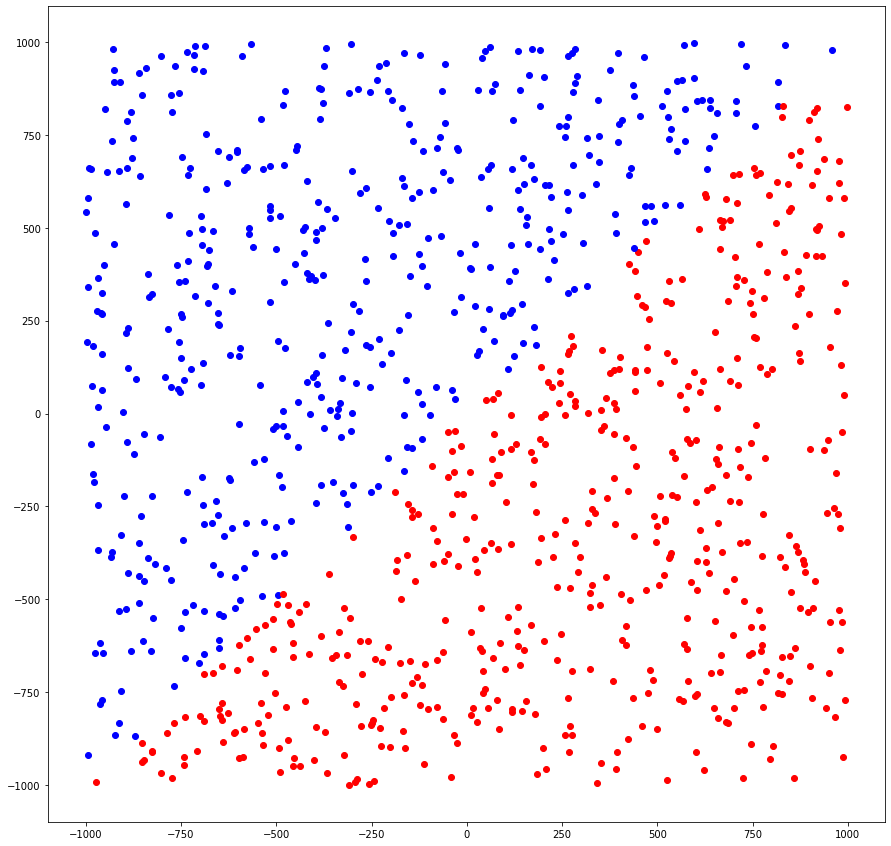

In [ ]:
#gráfico dos valores presentes no arquivo "dataAll.txt"
ig, ax = plt.subplots(figsize=(15, 15))
i=0
for i in range (len(dataAll_split)):
    x = dataAll_split[i][0]
    y = dataAll_split[i][1]
    if dataAll_split[i][2] < 1:
        y_blue = dataAll_split[i][1]
        plt.scatter(x,y_blue, c='blue')
    else:
        y_red = dataAll_split[i][1]
        plt.scatter(x, y_red, c='red')
plt.show()

In [ ]:
#adicionando o viés 1 a cada entrada
dataAll_split = np.concatenate((np.ones((len(dataAll_split),1)),dataAll_split),axis=1)
print(dataAll_split[0:5])

[[   1.     -363.7884  244.1423    0.    ]
 [   1.      328.7572 -256.7658    1.    ]
 [   1.     -164.9827  613.2164    0.    ]
 [   1.      536.5905  764.9575    0.    ]
 [   1.      314.2297  343.8375    0.    ]]


In [ ]:
#gerando pesos aleatórios no intervalo de [-0.5,0.5)
np.random.seed(0)
weights = np.random.uniform(-0.5,0.5,3)
print(weights[0:5])
weights.reshape(3,1)

[0.0488135  0.21518937 0.10276338]


array([[0.0488135 ],
       [0.21518937],
       [0.10276338]])

In [ ]:
#regra delta
def delta_rule(w, l, yd, yp, en):
    new_w = w + (l * (yd - yp) * en)
    return new_w

In [ ]:
#função de ativação degrau
def act_func(value):
    if value >= 0:
        return 1
    else:
        return 0

In [ ]:
#função do processo de aprendizagem
def learning_process(entradas, pesos):
    i=0
    j=0
    epoca=0
    pesos_antigo = np.ones((len(weights),1))
    mat_pesos = pesos
    prim_peso = pesos
    ult_peso = np.ones((len(weights),1))
    alt_pesos = 0
    
    while not np.array_equal(prim_peso,ult_peso):
        epoc_alt = 0
        prim_peso = ult_peso
        print("epoca",epoca+1)
        for i in range(len(dataAll_split)):
            result=0
            for j in range(len(dataAll_split[0])-1):
                aux = (entradas[i][j]*pesos[j])
                result = aux + result
            ativacao = act_func(result)
            if ativacao != (int(entradas[i][3])):
                pesos = np.squeeze(pesos)
                mat_pesos = delta_rule(pesos, 0.1, int(entradas[i][3]), ativacao, entradas[i][0:3])
            pesos_antigo = pesos
            novo_p = np.diag(mat_pesos)
            novo_p = novo_p[novo_p != 0]
            pesos = novo_p
            if np.array_equal(pesos_antigo, pesos):
                alt_pesos = alt_pesos + 1
                epoc_alt = epoc_alt + 1
        epoca = epoca+1
        print(epoc_alt,"alteracoes de peso na epoca",epoca)
        ult_peso = pesos

    print("passaram",epoca,"epocas")
    print("ocorreram",alt_pesos,"ajustes de peso")
    print("pesos finais:",pesos)

    return pesos[0], pesos[1], pesos[2]

In [ ]:
w0,w1,w2 = learning_process(dataAll_split, weights)

epoca 1
953 alteracoes de peso na epoca 1
epoca 2
977 alteracoes de peso na epoca 2
epoca 3
974 alteracoes de peso na epoca 3
epoca 4
982 alteracoes de peso na epoca 4
epoca 5
986 alteracoes de peso na epoca 5
epoca 6
987 alteracoes de peso na epoca 6
epoca 7
994 alteracoes de peso na epoca 7
epoca 8
982 alteracoes de peso na epoca 8
epoca 9
997 alteracoes de peso na epoca 9
epoca 10
997 alteracoes de peso na epoca 10
epoca 11
997 alteracoes de peso na epoca 11
epoca 12
997 alteracoes de peso na epoca 12
epoca 13
985 alteracoes de peso na epoca 13
epoca 14
1000 alteracoes de peso na epoca 14
passaram 14 epocas
ocorreram 13808 ajustes de peso
pesos finais: [   1.4488135   587.99885937 -585.68905662]


In [ ]:
#função para encontrar a equação da reta
def find_line(w0,w1,w2):
    c = (w0/w2)
    mx = - (w1/w2)

    return c,mx

In [ ]:
#removendo o viés das entradas
dataAll_split = np.split(dataAll, 1000)
len(dataAll_split)
print(dataAll_split[0])

[-363.7884  244.1423    0.    ]


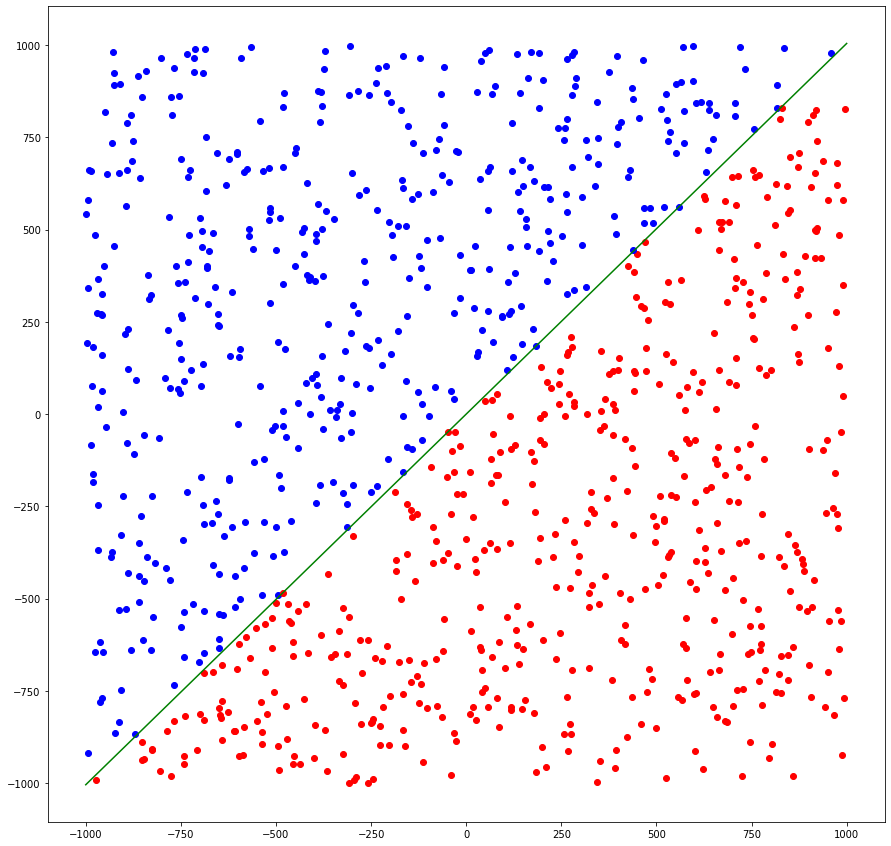

In [ ]:
#gráfico com a reta gerada apartir dos valores resultantes do processo de aprendizado
fig, ax = plt.subplots(figsize=(15, 15))

c,mx =  find_line(w0,w1,w2)
i=0
x1 = np.linspace(-1000,1000,10)
y1 = mx*x1 - c 
plt.plot(x1, y1, 'green')
for i in range (len(dataAll_split)):
    x = dataAll_split[i][0]
    y = dataAll_split[i][1]
    if dataAll_split[i][2] < 1:
        y_blue = dataAll_split[i][1]
        plt.scatter(x,y_blue, c='blue')
    else:
        y_red = dataAll_split[i][1]
        plt.scatter(x, y_red, c='red')
plt.show()

# Parte 3 - Validação Holdout em Problema Não-Linearmente Separável

In [ ]:
#carregando arquivo "dataHoldout.txt" do drive
drive.mount('/content/drive')
dataHoldout = np.fromfile("/content/drive/My Drive/dataHoldout.txt")
np.set_printoptions(threshold=sys.maxsize)
len(dataHoldout)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2400

In [ ]:
#separando as entradas com seus respectivos valores de x1, x2 e yd
dataHoldout_split = np.split(dataHoldout, (len(dataHoldout)/3))
len(dataHoldout_split)
print(dataHoldout_split[0])

[-0.29322959 -0.09065359  1.        ]


In [ ]:
#mostrando as primeiras entradas
j=0
for j in range (5):
    print(dataHoldout_split[j])

[-0.29322959 -0.09065359  1.        ]
[0.07988839 0.21101297 1.        ]
[-0.07825563 -0.08083512  1.        ]
[-0.46833414 -0.10620722  1.        ]
[0.46304142 0.09405471 1.        ]


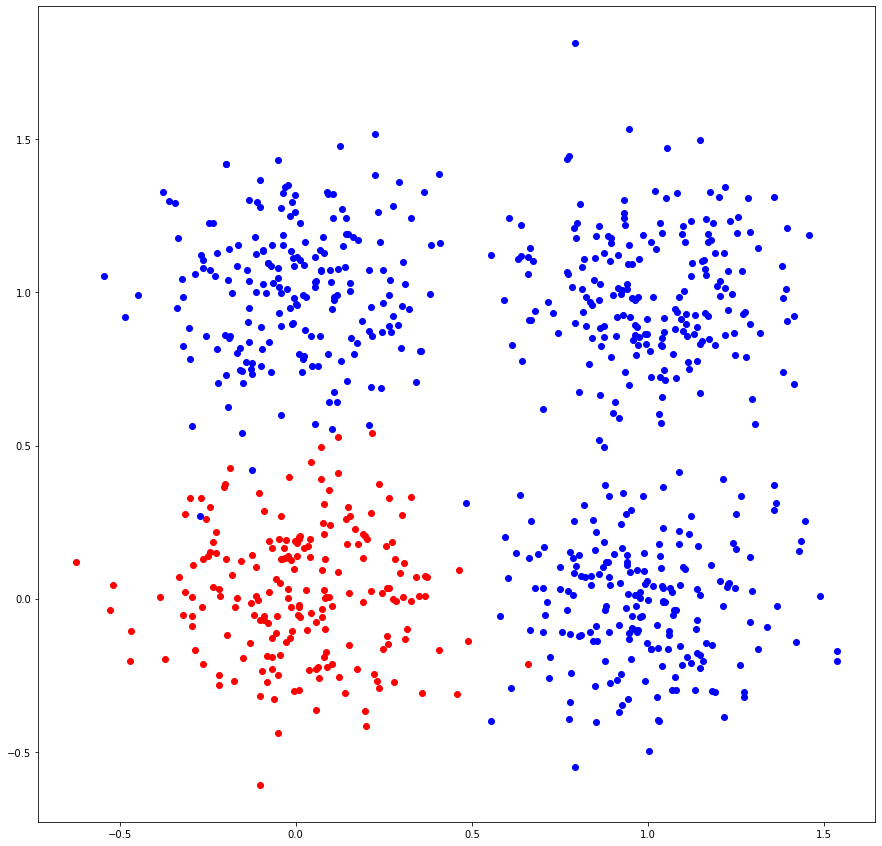

In [ ]:
#gráfico dos valores presentes no arquivo "dataHoldout.txt"
ig, ax = plt.subplots(figsize=(15, 15))
i=0
for i in range (len(dataHoldout_split)):
    x = dataHoldout_split[i][0]
    y = dataHoldout_split[i][1]
    if dataHoldout_split[i][2] < 1:
        y_blue = dataHoldout_split[i][1]
        plt.scatter(x,y_blue, c='blue')
    else:
        y_red = dataHoldout_split[i][1]
        plt.scatter(x, y_red, c='red')
plt.show()

In [ ]:
#adicionando o viés 1 a cada entrada
dataHoldout_split = np.concatenate((np.ones((len(dataHoldout_split),1)),dataHoldout_split),axis=1)
print(dataHoldout_split[0:5])

[[ 1.         -0.29322959 -0.09065359  1.        ]
 [ 1.          0.07988839  0.21101297  1.        ]
 [ 1.         -0.07825563 -0.08083512  1.        ]
 [ 1.         -0.46833414 -0.10620722  1.        ]
 [ 1.          0.46304142  0.09405471  1.        ]]


In [ ]:
#randomizando os dados para separá-los em treino e teste
np.random.shuffle(dataHoldout_split)
print(dataHoldout_split[0:5])

[[ 1.00000000e+00  8.24192013e-02  1.06606167e-03  1.00000000e+00]
 [ 1.00000000e+00 -3.13490882e-02  1.34302578e+00  0.00000000e+00]
 [ 1.00000000e+00 -1.06717243e-01 -4.45962833e-03  1.00000000e+00]
 [ 1.00000000e+00  3.40380834e-01  7.08045342e-01  0.00000000e+00]
 [ 1.00000000e+00 -1.42484292e-01  7.74490167e-01  0.00000000e+00]]


In [ ]:
#função de divisão dos dados em partições de treino e teste
def split_data(data, perc):
    train_qtd = int(len(data)*perc)
    train_split = data[:train_qtd]
    test_split = data[train_qtd:]

    return train_split, test_split

In [ ]:
#divindo os dados em treino e teste, numa divisão de 60/40
train, test = split_data(dataHoldout_split, 0.6)

In [ ]:
#função do processo de aprendizagem
#foi adotado learning rate de 0.1 e os pesos distribuídos uniformemente no intervalo [-0.5,0,5)
def holdout_learning(entradas, pesos):
    i=0
    j=0
    epoca=0
    pesos_antigo = np.ones((len(pesos),1))
    mat_pesos = pesos
    prim_peso = pesos
    ult_peso = np.ones((len(pesos),1))
    alt_pesos = 0
    
    while epoca<100:
        np.random.shuffle(entradas)
        epoc_alt = 0
        prim_peso = ult_peso
        print("epoca",epoca+1)
        print("exemplos de treino:")
        for k in range(len(train)):
            print(entradas[k][1:])
        for i in range(len(entradas)):
            result=0
            for j in range(len(entradas[0])-1):
                aux = (entradas[i][j]*pesos[j])
                result = aux + result
            ativacao = act_func(result)
            if ativacao != (int(entradas[i][3])):
                pesos = np.squeeze(pesos)
                mat_pesos = delta_rule(pesos, 0.1, int(entradas[i][3]), ativacao, entradas[i][0:3])
            pesos_antigo = pesos
            novo_p = np.diag(mat_pesos)
            novo_p = novo_p[novo_p != 0]
            pesos = novo_p
            if np.array_equal(pesos_antigo, pesos):
                alt_pesos = alt_pesos + 1
                epoc_alt = epoc_alt + 1
        epoca = epoca+1
        ult_peso = pesos

    print("pesos finais:",pesos)

    return pesos

In [ ]:
hold_weight= holdout_learning(train, weights)

A saída de streaming foi truncada nas últimas 5000 linhas.
[0.15640596 0.84981368 0.        ]
[1.16247446 1.07530456 0.        ]
[1.28878368 0.13512926 0.        ]
[1.25047654 0.16264413 0.        ]
[1.24169544 0.18169789 0.        ]
[1.00805346 1.16344447 0.        ]
[-0.07849193  1.09714508  0.        ]
[1.0790991  0.72214258 0.        ]
[ 0.85326917 -0.0888566   0.        ]
[0.83248083 0.76578614 0.        ]
[ 1.14842667 -0.22549009  0.        ]
[0.09032966 1.32070946 0.        ]
[ 0.91808068 -0.36937589  0.        ]
[1.09934728 0.10419019 0.        ]
[-0.14901252  0.70308228  0.        ]
[1.13838714 0.7774128  0.        ]
[0.10944287 0.97542507 0.        ]
[0.02549432 0.87654871 0.        ]
[-0.0419761   1.27459607  0.        ]
[0.8763344  0.88998732 0.        ]
[0.89618728 1.17662769 0.        ]
[0.93162374 1.24194135 0.        ]
[-0.10259311 -0.06961393  1.        ]
[-0.09317084  1.13996994  0.        ]
[1.18398194 1.22600211 0.        ]
[0.25776183 0.03455125 1.        ]
[ 1.337

In [ ]:
#função que realizará a predição
def holdout_pred(test_data, weig):
    real_value = np.empty((test_data.shape[0],1))
    pred_value = np.empty((test_data.shape[0],1))
    for i in range(len(test_data)):
        result=0
        for j in range(len(test_data[0])-1):
            aux = (test_data[i][j]*weig[j])
            hold_result = aux + result
            #print("valor da iteracao",i,":",result)
        hold_act = act_func(hold_result)
        #print(hold_act)
        #print(int(test_data[i][3]))
        #np.insert(real_value, i, int(test_data[i][3]))
        #np.insert(pred_value, i, hold_act)
        real_value[i] = int(test_data[i][3])
        pred_value[i] = hold_act
    return real_value, pred_value

In [ ]:
real, pred = holdout_pred(test,hold_weight)

In [ ]:
#convertendo os valores obtidos para números inteiro
real = real.astype(int)
pred = pred.astype(int)

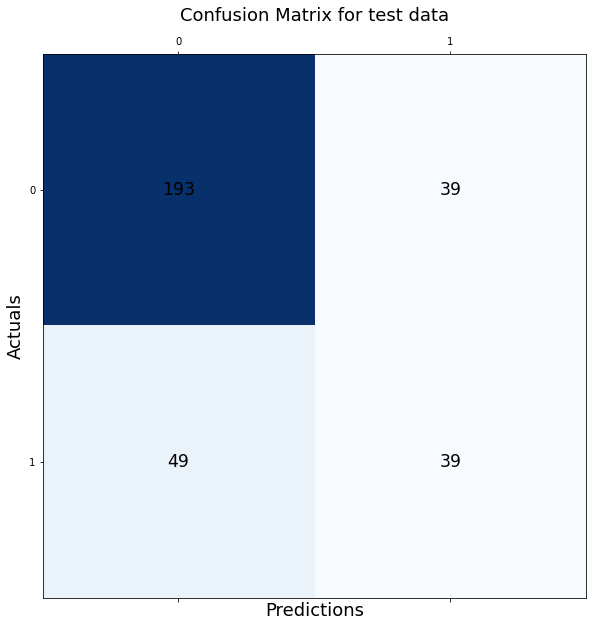

In [ ]:
#matriz de confusão para os dados de teste
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(real, pred)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=1)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for test data', fontsize=18)
plt.show()

In [ ]:
real_train, pred_train = holdout_pred(train,hold_weight)

In [ ]:
from sklearn import metrics
result_acc_train = metrics.accuracy_score(real_train,pred_train)
print("Acurácia para os dados de treino:", result_acc_train)

Acurácia para os dados de treino: 0.74375


In [ ]:
result_prec_train = metrics.precision_score(real_train, pred_train, average='weighted', zero_division=0)
print("Precisão para os dados de treino:",result_prec_train)

Precisão para os dados de treino: 0.739793540627897


In [ ]:
result_rec_train = metrics.recall_score(real_train, pred_train, average='weighted')
print("Revocação para os dados de treino:",result_rec_train)

Revocação para os dados de treino: 0.74375


In [ ]:
result_f1_train = metrics.f1_score(real_train, pred_train, average='weighted')
print("F1-score para os dados de treino:",result_f1_train)

F1-score para os dados de treino: 0.7416893128500914


A partir dos valores obtidos para as referidas métricas aplicadas sobre os dados de treino, é possível afirmar que a solução alcançará resultados aceitáveis sobre os dados de teste, porém é esperado que os valores das métricas possam diminuir um pouco quando comparados com os valores das métricas obtidas nos dados de treino.

In [ ]:
#removendo os viéses dos dados de treino e teste
train = np.delete(train,0,1)
test = np.delete(test,0,1)

In [ ]:
print(test[0])
print(train[0])

[0.99646156 0.05810024 0.        ]
[0.34015635 0.06961302 1.        ]


Text(0.5, 1.0, 'test predictions')

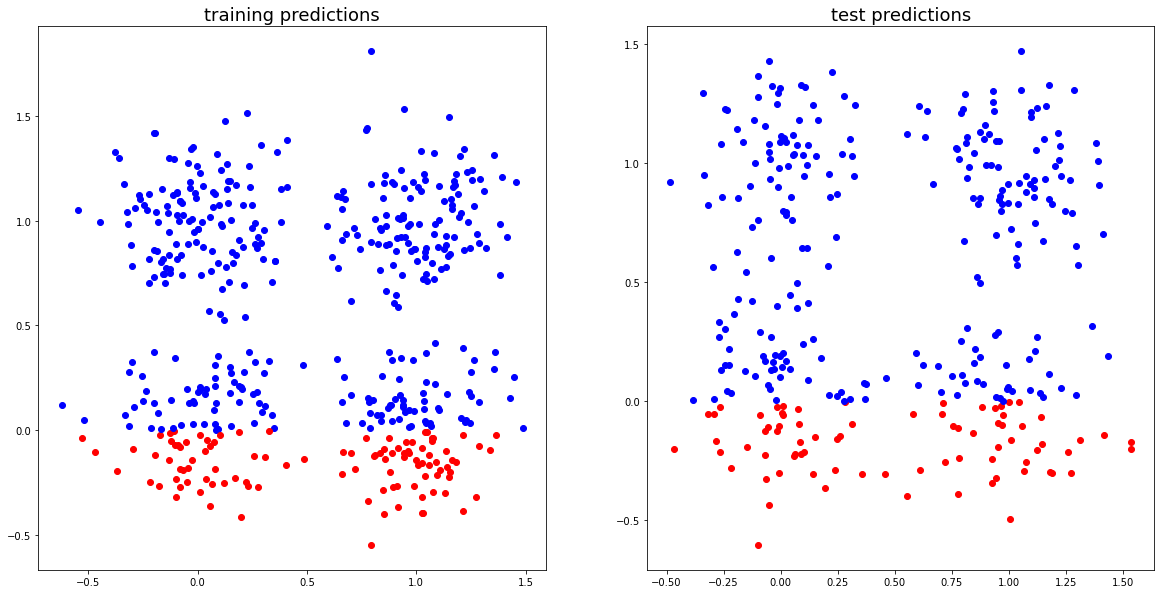

In [ ]:
#gráfico das soluções obtidas para os dados de treino e teste"
plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
i=0
for i in range (len(train)):
    x = train[i][0]
    y = train[i][1]
    if pred_train[i] < 1:
        y_blue = train[i][1]
        plt.scatter(x,y_blue, c='blue')
    else:
        y_red = train[i][1]
        plt.scatter(x, y_red, c='red')
plt.title('training predictions', fontsize=18)

plt.subplot(1, 2, 2)
i=0
for i in range (len(test)):
    x = test[i][0]
    y = test[i][1]
    if pred[i] < 1:
        y_blue = test[i][1]
        plt.scatter(x,y_blue, c='blue')
    else:
        y_red = test[i][1]
        plt.scatter(x, y_red, c='red')
plt.title('test predictions', fontsize=18)